In [1]:
import numpy as np 
import pandas as pd 
import time  

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df[['Age','EstimatedSalary','Purchased']]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
# here it dowing the standing scalling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
x_scaled.shape

(400, 2)

In [8]:
import tensorflow as tf 
from tensorflow  import keras 
from keras import Sequential 
from keras.layers import Dense 

In [15]:
model = Sequential()

model.add(Dense(10,activation = 'relu',input_dim = 2))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# here using the (batch_size = 320 is for batch GD)
model.compile(loss= 'binary_crossentropy',metrics = ['accuracy'])
start = time.time()
history = model.fit(x_scaled,y,epochs = 10,batch_size = 400,validation_split=0.2 )
print(time.time() - start)  # here it not come closer to the solution

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5844 - loss: 0.6751 - val_accuracy: 0.6125 - val_loss: 0.6705
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6156 - loss: 0.6683 - val_accuracy: 0.6125 - val_loss: 0.6690
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6250 - loss: 0.6636 - val_accuracy: 0.6125 - val_loss: 0.6677
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6250 - loss: 0.6596 - val_accuracy: 0.6250 - val_loss: 0.6666
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6313 - loss: 0.6560 - val_accuracy: 0.6250 - val_loss: 0.6655
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6562 - loss: 0.6528 - val_accuracy: 0.6250 - val_loss: 0.6645
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6781 - loss: 0.6497 - val_accuracy: 0.6625 - val_loss: 0.6635
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6812 - loss: 0.6468 - val_accuracy: 0.6625 - val_loss: 0.6626
Ep

In [16]:
# here using the (batch_size = 320 is for st GD)
model.compile(loss= 'binary_crossentropy',metrics = ['accuracy'])
start = time.time()
history = model.fit(x_scaled,y,epochs = 10,batch_size = 1,validation_split=0.2 )
print(time.time() - start) # here it come coluser to the soloution

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7558 - loss: 0.5877 - val_accuracy: 0.5875 - val_loss: 0.6372
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8460 - loss: 0.3730 - val_accuracy: 0.7000 - val_loss: 0.5605
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8951 - loss: 0.2780 - val_accuracy: 0.7500 - val_loss: 0.4811
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8689 - loss: 0.2967 - val_accuracy: 0.7875 - val_loss: 0.4265
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8611 - loss: 0.2794 - val_accuracy: 0.8875 - val_loss: 0.3824
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8561 - loss: 0.3043 - val_accuracy: 0.9125 - val_loss: 0.3450
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8658 - loss: 0.2715 - val_accuracy: 0.9250 - val_loss: 0.3133
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.8630 - loss: 0.2661 - val_accuracy

In [17]:
# here it ploting for suing for the 
model.compile(loss= 'binary_crossentropy',metrics = ['accuracy'])
# start = time.time()
history = model.fit(x_scaled,y,epochs = 500,batch_size = 1,validation_split=0.2 )
# print(time.time() - start) # here it come coluser to the soloution

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8681 - loss: 0.3055 - val_accuracy: 0.9750 - val_loss: 0.2326
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.9132 - loss: 0.2217 - val_accuracy: 0.9750 - val_loss: 0.2255
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9096 - loss: 0.2211 - val_accuracy: 0.9750 - val_loss: 0.2051
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8845 - loss: 0.2794 - val_accuracy: 0.9750 - val_loss: 0.1949
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8915 - loss: 0.2248 - val_accuracy: 0.9625 - val_loss: 0.1878
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.8691 - loss: 0.3395 - val_accuracy: 0.9750 - val_loss: 0.1914
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9033 - loss: 0.2452 - val_accuracy: 0.9750 - val_loss: 0.1858
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.8889 - loss: 0.2466 - 

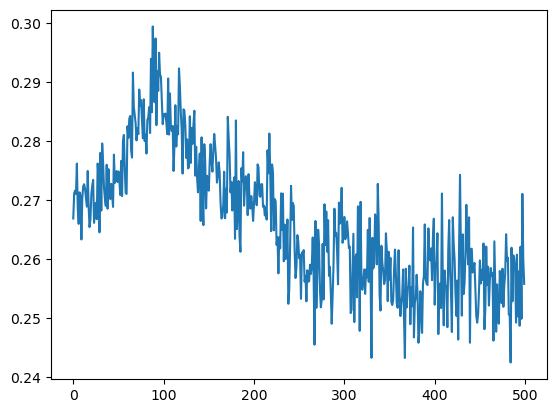

In [20]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.show()

In [21]:
# here it ploting for suing for the 
model.compile(loss= 'binary_crossentropy',metrics = ['accuracy'])
# start = time.time()
history = model.fit(x_scaled,y,epochs = 500,batch_size = 400,validation_split=0.2 )
# print(time.time() - start) # here it come coluser to the soloution

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9187 - loss: 0.2409 - val_accuracy: 0.8625 - val_loss: 0.3293
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9219 - loss: 0.2340 - val_accuracy: 0.8625 - val_loss: 0.3428
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9219 - loss: 0.2305 - val_accuracy: 0.8500 - val_loss: 0.3508
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9219 - loss: 0.2279 - val_accuracy: 0.8500 - val_loss: 0.3559
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9187 - loss: 0.2260 - val_accuracy: 0.8500 - val_loss: 0.3594
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9187 - loss: 0.2244 - val_accuracy: 0.8625 - val_loss: 0.3609
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9156 - loss: 0.2231 - val_accuracy: 0.8625 - val_loss: 0.3614
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9156 - loss: 0.2220 - val_accuracy: 0.8625 - val_loss: 0

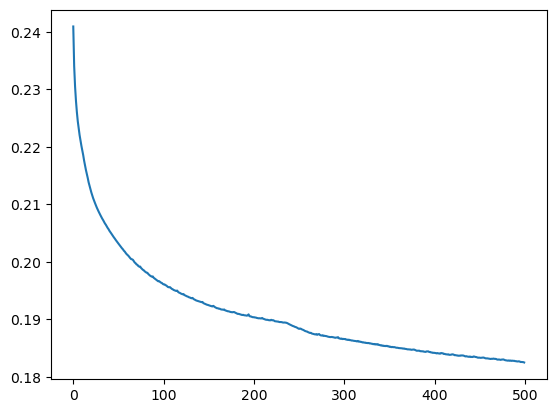

In [22]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.show()